<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [6]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [7]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [8]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [9]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### 1. Diagrama de caja (boxplot) para MEDV (Valor medio de las viviendas)

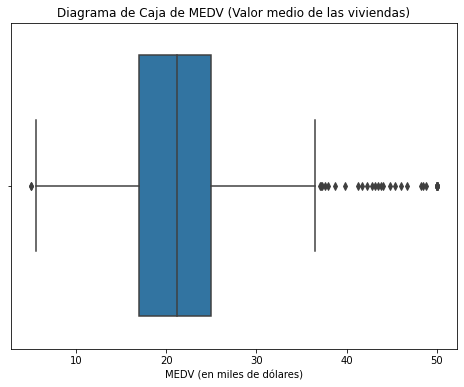

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Diagrama de Caja de MEDV (Valor medio de las viviendas)')
plt.xlabel('MEDV (en miles de dólares)')
plt.show()


#### 2. Diagrama de barras para la variable CHAS (Río Charles)

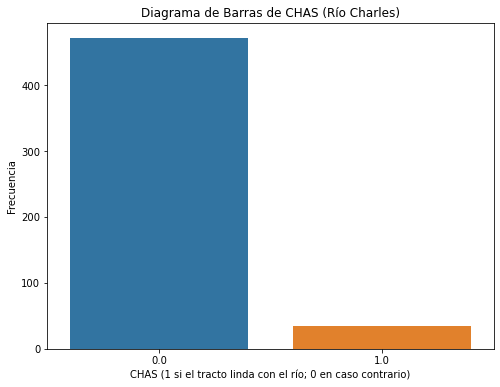

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Diagrama de Barras de CHAS (Río Charles)')
plt.xlabel('CHAS (1 si el tracto linda con el río; 0 en caso contrario)')
plt.ylabel('Frecuencia')
plt.show()

#### 3. Boxplot para MEDV frente a EDAD (Discretizada en tres grupos)

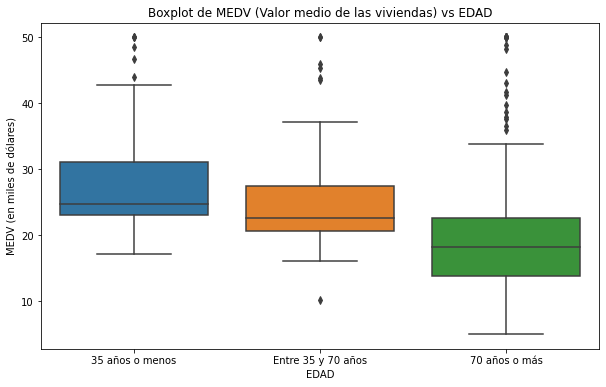

In [12]:
boston_df['EDAD_cat'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['35 años o menos', 'Entre 35 y 70 años', '70 años o más'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='EDAD_cat', y='MEDV', data=boston_df)
plt.title('Boxplot de MEDV (Valor medio de las viviendas) vs EDAD')
plt.xlabel('EDAD')
plt.ylabel('MEDV (en miles de dólares)')
plt.show()


#### 4. Diagrama de dispersión para NOX (Concentración de óxidos nítricos) vs INDUS (Proporción de acres comerciales no minoristas)

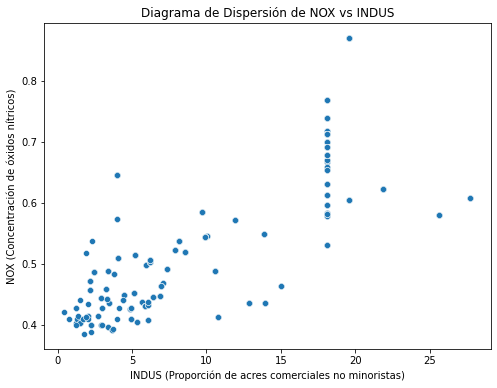

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Diagrama de Dispersión de NOX vs INDUS')
plt.xlabel('INDUS (Proporción de acres comerciales no minoristas)')
plt.ylabel('NOX (Concentración de óxidos nítricos)')
plt.show()

#### 5. Histograma para PTRATIO (Proporción de alumnos-profesor)

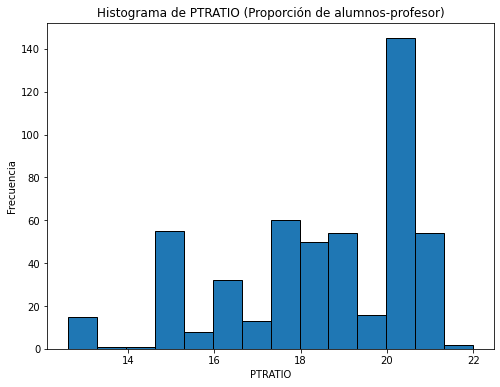

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins='auto', edgecolor='black')
plt.title('Histograma de PTRATIO (Proporción de alumnos-profesor)')
plt.xlabel('PTRATIO')
plt.ylabel('Frecuencia')
plt.show()

#### Preguntas específicas con pruebas estadísticas
##### ¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no? (Prueba T para muestras independientes)

In [15]:
chas_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_no = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = scipy.stats.ttest_ind(chas_yes, chas_no)
print(f'Valor de t: {t_stat}')
print(f'Valor p: {p_value}')
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Rechazamos la hipótesis nula. Hay una diferencia significativa en el valor medio de las casas delimitadas por el río Charles y las que no.")
else:
    print("Conclusion: No podemos rechazar la hipótesis nula. No hay suficiente evidencia para decir que hay una diferencia significativa en el valor medio de las casas delimitadas por el río Charles y las que no.")


Valor de t: 3.996437466090509
Valor p: 7.390623170519905e-05
Conclusion: Rechazamos la hipótesis nula. Hay una diferencia significativa en el valor medio de las casas delimitadas por el río Charles y las que no.


##### ¿Existe alguna diferencia en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE)? (ANOVA)

In [16]:
modelo_anova = ols('MEDV ~ C(EDAD_cat)', data=boston_df).fit()
tabla_anova = sm.stats.anova_lm(modelo_anova, typ=2)
print(tabla_anova)
alpha = 0.05
if tabla_anova['PR(>F)'][0] < alpha:
    print("Conclusion: Rechazamos la hipótesis nula. Hay diferencias significativas en los valores medios de las casas para al menos una categoría de edad.")
else:
    print("Conclusion: No podemos rechazar la hipótesis nula. No hay suficiente evidencia para decir que hay diferencias significativas en los valores medios de las casas para las diferentes categorías de edad.")


                   sum_sq     df         F        PR(>F)
C(EDAD_cat)   5401.731883    2.0  36.40765  1.710501e-15
Residual     37314.563532  503.0       NaN           NaN
Conclusion: Rechazamos la hipótesis nula. Hay diferencias significativas en los valores medios de las casas para al menos una categoría de edad.


##### ¿Podemos concluir que no existe relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad? (Correlación de Pearson)

In [18]:
correlacion, p_valor = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print(f'Coeficiente de correlación de Pearson: {correlacion}')
print(f'Valor p: {p_valor}')
alpha = 0.05
if p_valor < alpha:
    print("Conclusion: Rechazamos la hipótesis nula. Hay una relación lineal significativa entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad.")
else:
    print("Conclusion: No podemos rechazar la hipótesis nula. No hay suficiente evidencia para decir que hay una relación lineal significativa entre las concentraciones de óxido nítrico y la prop.")


Coeficiente de correlación de Pearson: 0.7636514469209149
Valor p: 7.913361061242812e-98
Conclusion: Rechazamos la hipótesis nula. Hay una relación lineal significativa entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad.


##### ¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston sobre el valor medio de las viviendas ocupadas por sus propietarios? (Análisis de regresión)

In [19]:
modelo_regresion = ols('MEDV ~ DIS', data=boston_df).fit()
print(modelo_regresion.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        10:19:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0